In [146]:
import numpy as np
from scipy.optimize import minimize
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Matriz de covariância

In [5]:
acoes_ibv = ['PETR4.SA', 'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA', 'ABEV3.SA']

In [33]:
data = pd.DataFrame()
for acao in acoes_ibv: 
    data[acao] = wb.DataReader(acao, data_source='yahoo', start='2008-2', end='2012-08')['Adj Close']

In [34]:
sec_returns = np.log(data / data.shift(1)) #retornos log de cada ativo

## Variâncias diárias

In [35]:
petr_var = sec_returns['PETR4.SA'].var()
petr_var


0.0006809411421726985

In [36]:
itub_var = sec_returns['ITUB4.SA'].var()
itub_var


0.0007312392639752093

In [37]:
bbdc_var = sec_returns['BBDC4.SA'].var()
bbdc_var


0.000867925333217729

In [38]:
bbas_var = sec_returns['BBAS3.SA'].var()
bbas_var


0.0007850017189678218

In [39]:
abev_var = sec_returns['ABEV3.SA'].var()
abev_var

0.0005221316184881688

In [40]:
sec_returns.mean() * 250

PETR4.SA   -0.155654
ITUB4.SA    0.039147
BBDC4.SA    0.034592
BBAS3.SA   -0.034766
ABEV3.SA    0.562794
dtype: float64

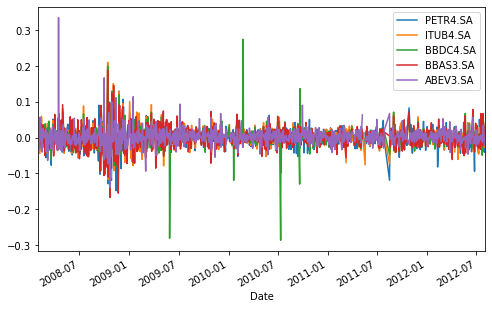

In [182]:
sec_returns.plot(figsize=(8,5))
plt.show()

## Variâncias Anualizadas

In [41]:
petr_var_a = sec_returns['PETR4.SA'].var() * 250
petr_var_a

0.17023528554317463

In [42]:
itub_var_a = sec_returns['PETR4.SA'].var() * 250
itub_var_a

0.17023528554317463

In [43]:
bbdc_var_a = sec_returns['BBDC4.SA'].var() * 250
bbdc_var_a

0.21698133330443226

In [44]:
bbas_var_a = sec_returns['BBAS3.SA'].var() * 250
bbas_var_a


0.19625042974195545

In [45]:
abev_var_a = sec_returns['ABEV3.SA'].var() * 250
abev_var_a

0.1305329046220422

In [186]:
cov_matrix = sec_returns.cov()
cov_matrix

,PETR4.SA,ITUB4.SA,BBDC4.SA,BBAS3.SA,ABEV3.SA
PETR4.SA,0.000681,0.000439,0.000408,0.000413,0.000184
ITUB4.SA,0.000439,0.000731,0.000571,0.000549,0.000222
BBDC4.SA,0.000408,0.000571,0.000868,0.000509,0.000207
BBAS3.SA,0.000413,0.000549,0.000509,0.000785,0.000233
ABEV3.SA,0.000184,0.000222,0.000207,0.000233,0.000522


In [66]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,PETR4.SA,ITUB4.SA,BBDC4.SA,BBAS3.SA,ABEV3.SA
PETR4.SA,0.170235,0.109754,0.102013,0.103336,0.045931
ITUB4.SA,0.109754,0.182810,0.142807,0.137356,0.055580
BBDC4.SA,0.102013,0.142807,0.216981,0.127221,0.051721
BBAS3.SA,0.103336,0.137356,0.127221,0.196250,0.058184
ABEV3.SA,0.045931,0.055580,0.051721,0.058184,0.130533


#maior variância BBDC4.SA
#maior covariância ITUB4 e BBDC4 -> AMBOS do setor bancário Bradesco e Itaú

In [187]:
sec_returns.corr()

,PETR4.SA,ITUB4.SA,BBDC4.SA,BBAS3.SA,ABEV3.SA
PETR4.SA,1.000000,0.623083,0.529874,0.564598,0.307670
ITUB4.SA,0.623083,1.000000,0.723028,0.726857,0.360199
BBDC4.SA,0.529874,0.723028,1.000000,0.620079,0.308173
BBAS3.SA,0.564598,0.726857,0.620079,1.000000,0.363309
ABEV3.SA,0.307670,0.360199,0.308173,0.363309,1.000000


## Fronteira eficiente

In [68]:
num_assets = len(acoes_ibv)
num_assets

5

In [70]:
#geração rondomica de pesos que soma sempre 1
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.13022088, 0.21815608, 0.01197845, 0.28325223, 0.35639235])

In [71]:
#retorno esperado do portfolio
np.sum(weights*sec_returns.mean())*250

0.17941322032049917

In [73]:
#variancia esperada para o portfolio
np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))

0.10180041468142509

In [74]:
#volatilidade esperada para o porfolio
np.sqrt(np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights)))

0.3190617725165851

In [154]:
pfolio_returns = []
pfolio_volatilities = []
pfolio_sharpe = []
pfolio_widgets = []

In [155]:
for x in range(10000):
    weights  = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_widgets.append(weights)
    pfolio_returns.append(np.sum(weights * sec_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))))
    pfolio_sharpe.append(pfolio_returns[x] / pfolio_volatilities[x])
    
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_widgets = np.array(pfolio_widgets)
pfolio_sharpe = np.array(pfolio_sharpe)
pfolio_returns, pfolio_volatilities

(array([0.07970542, 0.10341944, 0.10940123, ..., 0.11776385, 0.14351214,
        0.20177172]),
 array([0.33695744, 0.32887594, 0.33673883, ..., 0.35388621, 0.33273831,
        0.32189611]))

In [156]:
print("Sharpe máximo na simulação: {}".format(pfolio_sharpe.max()))
print("Índice sharpe máx: {}".format(pfolio_sharpe.argmax()))
pfolio_index = pfolio_sharpe.argmax()

Sharpe máximo na simulação: 1.3266404857713443
Índice sharpe máx: 7361


In [157]:
print("Distribuição da carteira:")
print(pfolio_widgets[pfolio_index, :])

print("Volatilidade esperada: {}".format(pfolio_volatilities[pfolio_index]))
print("Retorno esperado: {}".format(pfolio_returns[pfolio_index]))
max_ret = pfolio_returns[pfolio_sharpe.argmax()]
max_vol = pfolio_volatilities[pfolio_sharpe.argmax()]

Distribuição da carteira:
[0.02285541 0.01844132 0.17072869 0.03077568 0.7571989 ]
Volatilidade esperada: 0.3227305548210674
Retorno esperado: 0.4281474200210763


In [158]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [159]:
portfolios.tail()

,Return,Volatility
9995,0.137486,0.322767
9996,0.114084,0.327594
9997,0.117764,0.353886
9998,0.143512,0.332738
9999,0.201772,0.321896


In [160]:
portfolios.head()

,Return,Volatility
0,0.079705,0.336957
1,0.103419,0.328876
2,0.109401,0.336739
3,0.102923,0.333933
4,-0.025727,0.357842


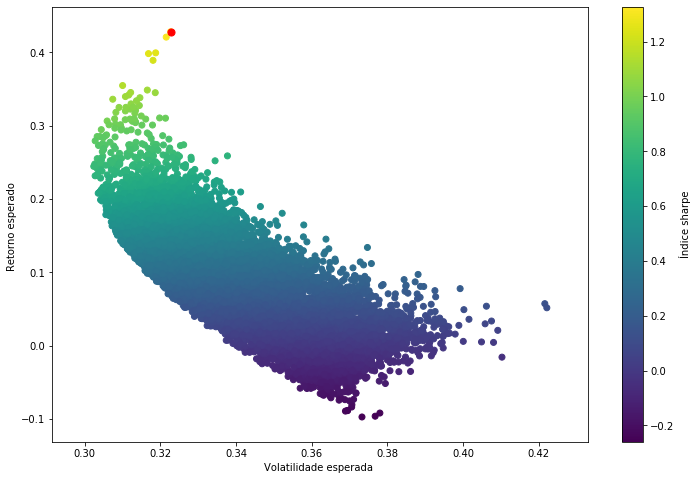

In [161]:
plt.figure(figsize=(12, 8))
plt.scatter(pfolio_volatilities, pfolio_returns, c = pfolio_sharpe, cmap = 'viridis')
plt.colorbar(label = 'Índice sharpe')
plt.xlabel('Volatilidade esperada ')
plt.ylabel('Retorno esperado ')
plt.scatter(max_vol, max_ret, c = 'red' , s=50 ) # ponto vermelho
plt.show()

In [164]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(sec_returns.mean() * weights) * 250
    vol = np.sqrt(np.dot(weights.T, np.dot(sec_returns.cov()*250, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [166]:
cons = ({'type': 'eq', 'fun':check_sum})
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))
init_guess = [0.25,0.25,0.25,0.25,0.25]


opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results)

     fun: -1.5577207393685883
     jac: array([9.78946477e-01, 5.54913893e-01, 5.21470711e-01, 7.90563241e-01,
       1.49011612e-08])
 message: 'Optimization terminated successfully.'
    nfev: 14
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([5.55111512e-17, 5.55111512e-17, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00])


In [167]:
get_ret_vol_sr(opt_results.x)

array([0.56279419, 0.36129338, 1.55772074])

In [178]:
frontier_y = np.linspace(0,0.5,200)

In [179]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [180]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])



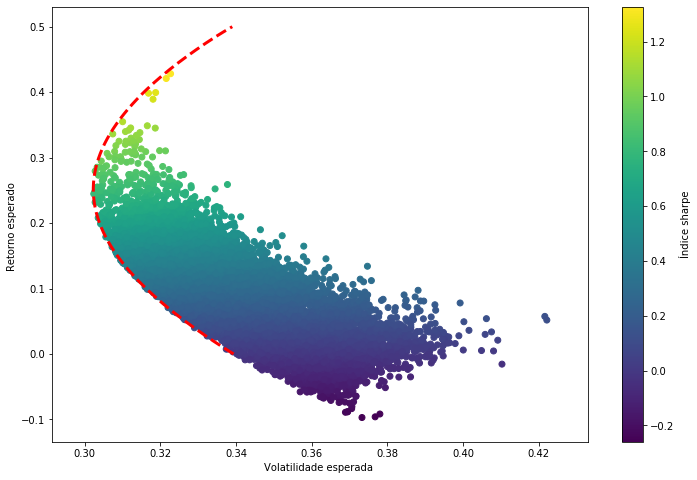

In [181]:
plt.figure(figsize=(12,8))
plt.scatter(pfolio_volatilities, pfolio_returns, c=pfolio_sharpe, cmap='viridis')
plt.colorbar(label = 'Índice sharpe')
plt.xlabel('Volatilidade esperada ')
plt.ylabel('Retorno esperado ')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.scatter(max_vol, max_ret, c = 'red' , s=50 ) # ponto vermelho
#plt.savefig('cover.png')
plt.show()